

The datasets used in this notebook can be found in the google drive link below - 

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing



The dataset you will analyze in this HW is the RMS Titanic. https://en.wikipedia.org/wiki/RMS_Titanic.

Your goal is to classify survivability based on the various factors of the passengers. 

For our problem, we will choose the factors listed below:

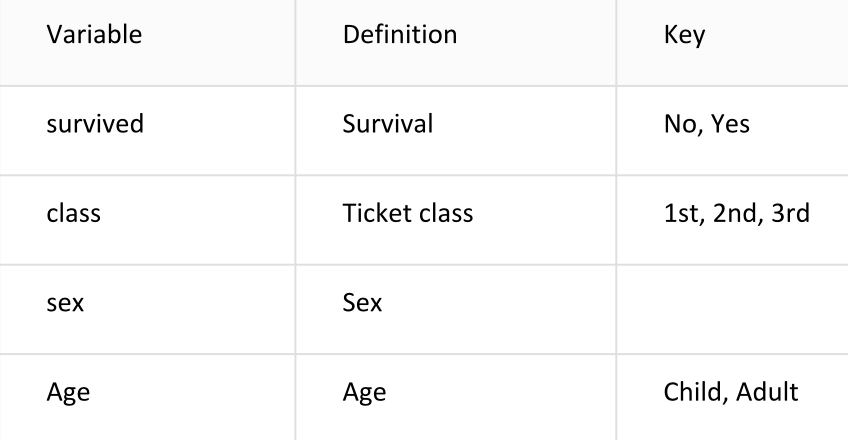

The dataset we will be using can be found in the shared dataset folder. The file name is Titanic.csv

1. Read the dataset into a dataframe. Display the first 5 rows of the dataframe. (2)
2. Explore the dataset and determine what is the target variable. (2)
3. Drop factor(s) that are not likely to be relevant for logistic regression. (2)
4. Make sure there are no missing values. Handle missing values if any. (2)
5. Plot count plots of each of the remaining factors (including the target variable). (3)
6. Convert all categorical feature variables into dummy variables. (3)
7. Partition the data into train and test sets (70/30). Use random_state = 2020. (2)
8. Fit the training data to a logistic regression model. (2)
9. Predict the outcomes for the test set. (2)
10. Display the accuracy of your predictions for survivability. (2)
11. Display the confusion matrix along with the labels (Yes, No).
Hint: You may want to use from sklearn.metrics import plot_confusion_matrix (2)
12. Now, display the predicted value of the survivability of a male adult passenger traveling in 3 rd class. (3)
13. Next, display the predicted probability of the survivability of a male adult passenger traveling in 3 rd class. (3)

In [ ]:
# import all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
# 1
df = pd.read_csv('Titanic.csv')
print(df.head())


   Passenger Class   Sex    Age Survived
0          1   3rd  Male  Child       No
1          2   3rd  Male  Child       No
2          3   3rd  Male  Child       No
3          4   3rd  Male  Child       No
4          5   3rd  Male  Child       No


In [ ]:
# 2: 'Survived' is the target variable
# 3: Drop the passenger column since it's not relevant
df.drop(df.columns[0],axis=1,inplace=True)
# 4: There are no missing values
print(df.isnull().sum())

Class       0
Sex         0
Age         0
Survived    0
dtype: int64


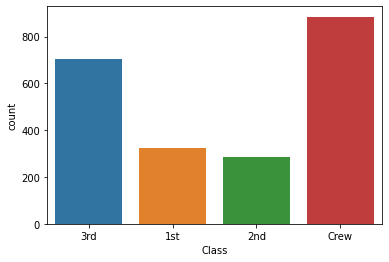

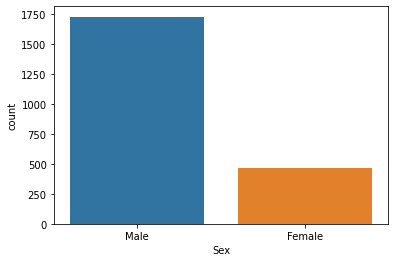

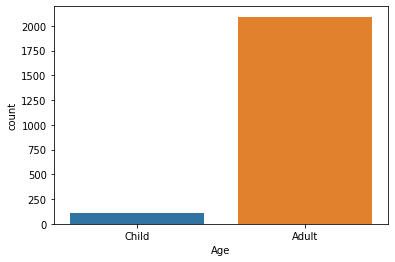

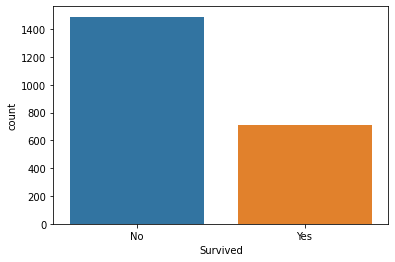

In [ ]:
# 5:
plt.figure(1)
sb.countplot(x='Class', data=df)

plt.figure(2)
sb.countplot(x='Sex', data=df)

plt.figure(3)
sb.countplot(x='Age', data=df)

plt.figure(4)
sb.countplot(x='Survived', data=df)

plt.show()

In [ ]:
# 6
df2 = pd.get_dummies(df, columns=['Class', 'Sex', 'Age', 'Survived'])
df2.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Sex_Female,Sex_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [ ]:
# 7
X = df2[['Class_1st', 'Class_2nd', 'Class_3rd', 'Class_Crew', 'Sex_Female', 'Sex_Male', 'Age_Adult', 'Age_Child']]
y = df2['Survived_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1540, 8)
(1540,)
(661, 8)
(661,)


In [ ]:
# 8
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 9 
y_pred = model.predict(X_test)
# 10: Accuracy score of 77.3%
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.773071104387292


[[436  17]
 [126  82]]


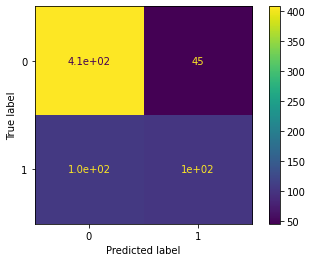

In [ ]:
# 11
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

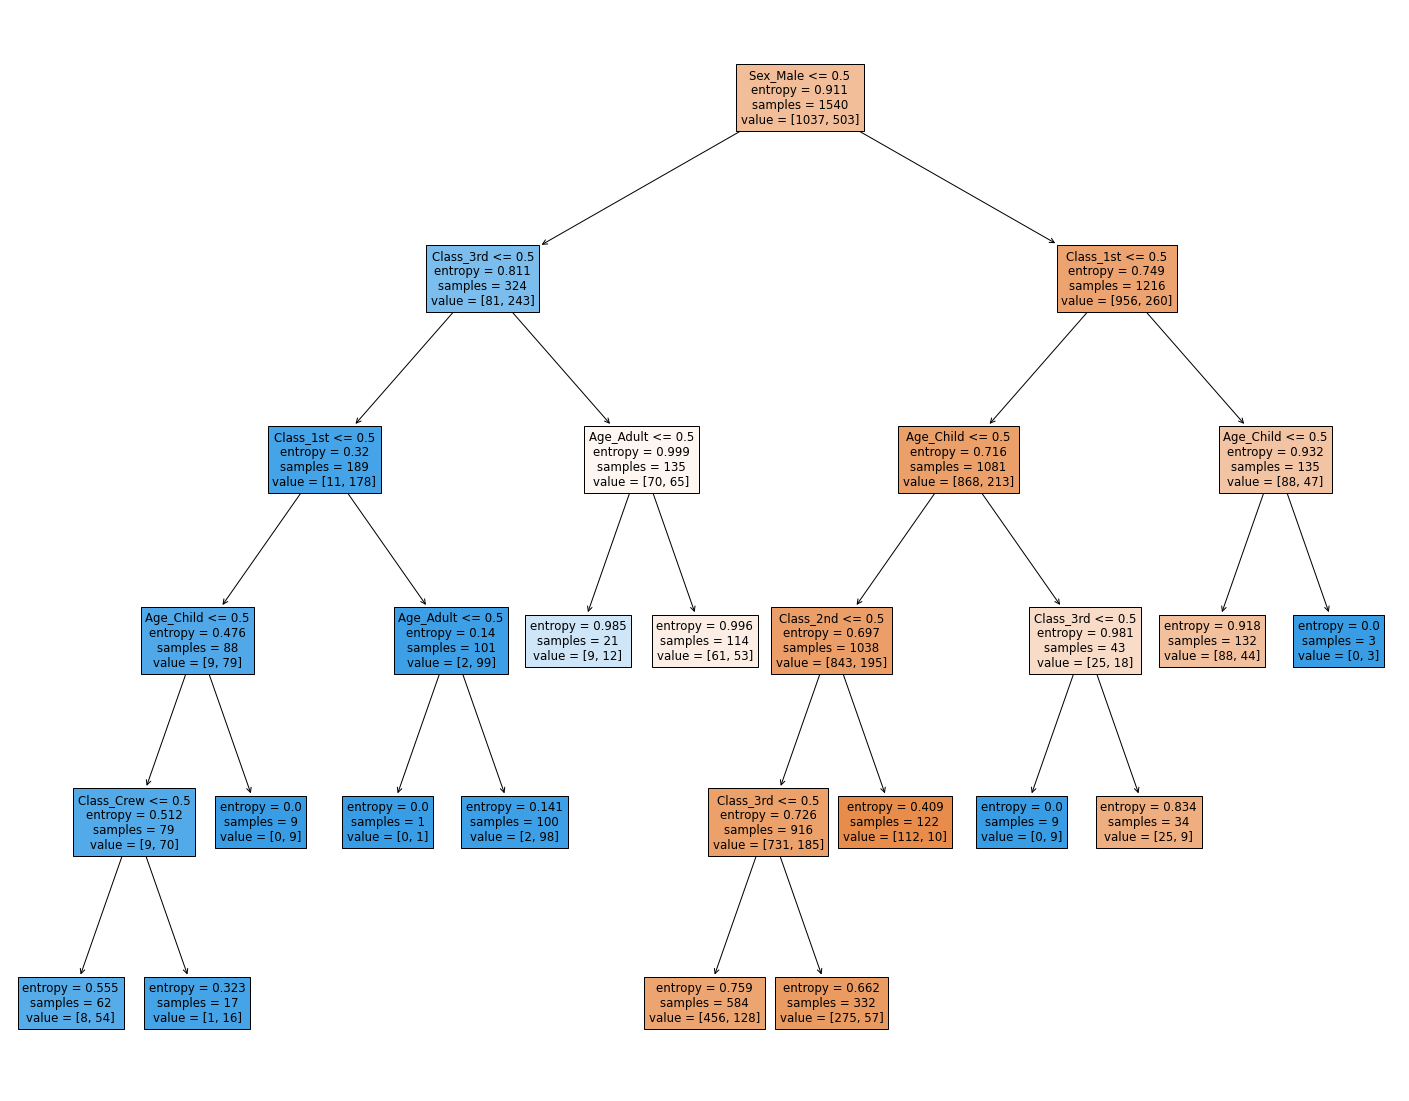

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
fig = plt.figure(figsize=(25,20))
fn = X.columns
irisTree = tree.plot_tree(dt, feature_names=fn, filled=True)
plt.show()
# 12: predicted value of adult male passenger in 3rd class is [70, 65]
# 13: predicited probability of adult male passenger in 3rd class is  0.99

In [ ]:
# display feature importances
print('Feature Importance:', dt.feature_importances_)
imp=pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
print(imp)

Feature Importance: [0.04262943 0.02610932 0.23017593 0.00616275 0.65222343 0.
 0.00592775 0.0367714 ]
            0         1
0   Class_1st  0.042629
1   Class_2nd  0.026109
2   Class_3rd  0.230176
3  Class_Crew  0.006163
4  Sex_Female  0.652223
5    Sex_Male  0.000000
6   Age_Adult  0.005928
7   Age_Child  0.036771


In [ ]:
# Type solution here
x_new = [0,0,1,0,0,1]
#model.predict(x_new)
#model.predict_proba